# Duomenų valdymas ir vaizdinimas

2020-10-13

- numpy
- matplotlib
- K1

---
- [NumPy](https://numpy.org/)

Tai fundamentali duomenų analizės pakuotė susidedanti iš:

- N-dimensių masyvų objektų.
- Masyvų  operacijų (broadcasting).
- Įrankių integruoti C/C++ ir Fortran programavimo kalbų kodą.
- Įvairų metodų duomenų analizei (algebra, FFT, atsitiktinių skaičių
  generavimas ir t.t.)
---
- [pandas](https://pandas.pydata.org/)

`pandas` skirta greitam duomenų manipuliavimui ir apžvalgai.
Sukurta SAS, STATA, SQL, R data.frame pavyzdžiu naudojant python ir numpy.
---
- [scipy](https://www.scipy.org/)

Python ekosistema atviro kodo programų skirtų duomenų analizei.
Pagrindinės pakuotės: NumPy, Matplotlib, IPython, SymPy, pandas, SciPy
biblioteka

## Numpy

Bibliotekų importavimas

In [1]:
import pathlib
import re
import numpy as np
import matplotlib.pyplot as plt

NumPy (Numerical Python) įgalina python programavimo kalbą efektyviai laikyti
ir manipuliuoti dideliais duomenų masyvais.
Tai pati svarbiausia biblioteka duomenų analizėje!

Siekdama efektyvumo NumPy leidžia masyvuose laikyti tik vieno tipo
kintamuosius.

In [2]:
simple_array = [1, 4, 2, 5, 3]
simple_array

[1, 4, 2, 5, 3]

Standartinius sąrašus galime lengvai paversti į NumPy masyvą:

In [3]:
simple_array = np.array(simple_array)
simple_array

array([1, 4, 2, 5, 3])

Jei sąraše yra skirtingi duomenų tipai tai jie  paverčiami į sudėtingiausią
tipą esanti sąraše.

Pvz:

Visi elementai paverčiami į `float`

In [4]:
np.array([3.14, 4, 2, 3])

array([3.14, 4.  , 2.  , 3.  ])

Visi elementai paverčiami į tekstą

In [5]:
np.array([3.14, 4, 2, 3, 't'])

array(['3.14', '4', '2', '3', 't'], dtype='<U32')

Tipą galime nurodyti kūrimo metu

In [6]:
np.array([1, 2, 3, 4], dtype='float32')

array([1., 2., 3., 4.], dtype=float32)

Teksto elementų paversti skaičiais negalime

In [7]:
np.array([1, 't', 3, 4], dtype='float32')

ValueError: could not convert string to float: 't'

Daugiadimensiai masyvai susikuria iš daugiadimensių sąrašų (nested)

In [8]:
listA = [[4, 5], [3, 2]]
np.array(listA)

array([[4, 5],
       [3, 2]])

### Dažnai pasitaikantys metodai

Tuščias masyvas 3x3 dimensijų (vertės lieka tokios kokios prieš tai buvo
išskirtose atminties blokuose)

In [9]:
np.empty((3, 3), dtype=float)

array([[1.13612048e-313, 0.00000000e+000, 6.93372455e-310],
       [6.93369103e-310, 6.93369105e-310, 6.93372461e-310],
       [6.93372459e-310, 6.93369103e-310, 3.95252517e-322]])

10 elementų nuliai:

In [10]:
np.zeros(10, dtype=int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

3x5 float vienetų masyvas

In [11]:
np.ones((3, 5), dtype=float)

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

2d masyvas su vienetais pagrindinėje įstrižainėje

In [12]:
np.identity(n=5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

Nurodytoje įstrižainėje

In [13]:
np.eye(N=3,  # rows
       M=5,  # columns
       k=1   # Index of the diagonal (main diagonal 0 is default)
       )

array([[0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.]])

3x5 float masyvas su specifine reikšme

In [14]:
np.full((3, 5), 3.14)

array([[3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14]])

Masyvas užpildytas nurodytomis vertėmis

In [15]:
np.full((3, 5), [3.14, 2, 3, 4, 5])

array([[3.14, 2.  , 3.  , 4.  , 5.  ],
       [3.14, 2.  , 3.  , 4.  , 5.  ],
       [3.14, 2.  , 3.  , 4.  , 5.  ]])

#### `np.arange`

Python dažnai naudojamas metodas `range` turi porą alternatyvų NumPy
pakuotėje

`range` -> `arange(start,end,step)`

In [16]:
np.arange(0, 20, 2)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

#### `np.linspace`

In [18]:
np_array, step = np.linspace(0, # pradinis taškas
1, # pabaiga
5, # taškų skaičius
endpoint=False, # Paskutinio elemento įtraukimas
retstep=True, # žingsnis
dtype=float) # duomenų tipas

step, np_array

(0.2, array([0. , 0.2, 0.4, 0.6, 0.8]))

In [19]:
np_array, step = np.linspace(
    0, 1, 5, endpoint=False, retstep=True, dtype=float)
np_array

array([0. , 0.2, 0.4, 0.6, 0.8])

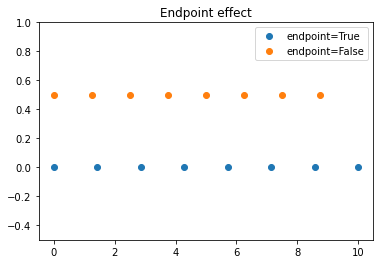

In [20]:
N = 8
y = np.zeros(N)
x1 = np.linspace(0, 10, N, endpoint=True)
x2 = np.linspace(0, 10, N, endpoint=False)
plt.plot(x1, y, 'o', label='endpoint=True')
plt.plot(x2, y + 0.5, 'o', label='endpoint=False')
plt.ylim([-0.5, 1])
plt.title('Endpoint effect')
plt.legend();

Geometrinė progresija nuo 1 iki 10, vienodais tarpais

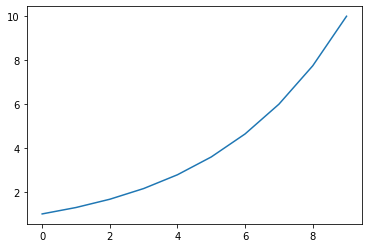

In [21]:
x = np.geomspace(1, 10, num=10, endpoint=True, dtype=float)
plt.plot(x);

Logaritminė skaičių seka (gali būti skirtinga bazė)

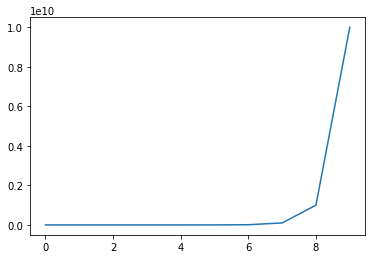

In [22]:
x = np.logspace(1, 10, 10, endpoint=True, base=10.0, dtype=float)
plt.plot(x);

### Atsitiktiniai skaičiai

NumPy turi metodus generuoti atsitiktinius skaičius.

Pati svarbiausia dalis dirbant su atsitiktiniais skaičiais yra
nustatymas atsitiktinio generavimo pradmens (seed).
Kiekvieną kartą nustačius naujai pradmenį tie patys atsitiktiniai skaičiai yra sugeneruojami.
Tokiu būdu mes galime atkartoti "atsitiktinius" eksperimentus.

Dažniausiai naudojama pradmens nustatymo ir atsitiktinių skaičių
generavimo sintaksė:

In [23]:
np.random.seed(1)
np.random.random()

0.417022004702574

In [24]:
np.random.random()

0.7203244934421581

In [25]:
np.random.seed(1)
np.random.random()

0.417022004702574

In [26]:
np.random.random()

0.7203244934421581

Šio metodo sintaksė panaši į random pakuotės naudojamą sintaksę

In [27]:
import random
random.seed(1)
random.random()

0.13436424411240122

NumPy `seed` funkcija įtakoja tik NumPy ir ją naudojančias pakuotes!
Globalų pradmenį galima nustatyti random pakuotės pagalba.

Nustatyti atsitiktinių skaičių kūrimo pradmenis ir generuoti
atsitiktinius skaičius galima ir per objektus:

Pirmiausiai apsibrėžiam naują generatoriaus objektą kuriame nurodome pradmenį
generuojančius parametrus ir tada naudojame sukurtą objektą `rng` šaukdami jo metodus.

In [28]:
rng = np.random.default_rng(seed=1)
rng.random()

0.5118216247002567

In [29]:
rng = np.random.default_rng(seed=1)
rng.random()

0.5118216247002567

In [ ]:
np.random?

#### Metodai generuojantys atsitiktinių skaičių sekas

Atsitiktinis float skaičius intervale [0.0, 1.0) iš tolygaus skirstinio:

In [30]:
rng.random(size=4)

array([0.9504637 , 0.14415961, 0.94864945, 0.31183145])

In [31]:
rng.random()

0.42332644897257565

In [32]:
rng.shuffle?

Docstring:
shuffle(x, axis=0)

Modify a sequence in-place by shuffling its contents.

The order of sub-arrays is changed but their contents remains the same.

Parameters
----------
x : array_like
    The array or list to be shuffled.
axis : int, optional
    The axis which `x` is shuffled along. Default is 0.
    It is only supported on `ndarray` objects.

Returns
-------
None

Examples
--------
>>> rng = np.random.default_rng()
>>> arr = np.arange(10)
>>> rng.shuffle(arr)
>>> arr
[1 7 5 2 9 4 3 6 0 8] # random

>>> arr = np.arange(9).reshape((3, 3))
>>> rng.shuffle(arr)
>>> arr
array([[3, 4, 5], # random
       [6, 7, 8],
       [0, 1, 2]])

>>> arr = np.arange(9).reshape((3, 3))
>>> rng.shuffle(arr, axis=1)
>>> arr
array([[2, 0, 1], # random
       [5, 3, 4],
       [8, 6, 7]])
Type:      builtin_function_or_method


Sumaišyti sąrašą galime

In [33]:
listA = np.arange(10)
listA

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [34]:
rng.shuffle(listA)
listA

array([0, 1, 8, 6, 5, 7, 9, 2, 3, 4])

Atsitiktinai pasirinkti elementą iš sąrašo (np.choice?)

In [35]:
rng.choice(listA)

2

Atsitiktinis sveikas skaičius

In [36]:
np.random.randint(8)

7

Atsitiktinis skaičius iš normalaus skirstinio

In [37]:
rng.normal()

0.5467129866124469

Atsitiktinis skaičius iš Puasono skirstinio

In [38]:
rng.poisson()

0

### Informacija apie masyvus

Sukūrus masyvus ar importavus duomenis pirmiausiai norime gauti
informaciją apie juos

In [39]:
x1 = np.arange(12)
x1

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [41]:
print("x1 dimensions: ", x1.ndim)

x1 dimensions:  1


In [42]:
print("x1 shape:", x1.shape)

x1 shape: (12,)


In [43]:
print("x1 size:", x1.size)

x1 size: 12


In [44]:
print("x1 type:", x1.dtype)

x1 type: int64


In [45]:
print("x1 size in bits of every element:", x1.itemsize)

x1 size in bits of every element: 8


In [46]:
print("total size of array:", x1.nbytes)

total size of array: 96


### Performatavimas masyvo dimensijų

In [47]:
x2 = np.arange(0, 12)
np.reshape(a=x2,                
           newshape=[2, 6])     # naujos dimensijos

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

Tą patį galima padaryt vienoje eilutėje sujungus abi komandas tašku

In [49]:
x2 = np.arange(0, 12).reshape(2, 6)
x2

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [50]:
print("x2 dimensions: ", x2.ndim)

x2 dimensions:  2


In [51]:
print("x2 shape:", x2.shape)

x2 shape: (2, 6)


In [52]:
print("x2 size:", x2.size)

x2 size: 12


In [53]:
print("x2 type:", x2.dtype)

x2 type: int64


In [54]:
print("x2 size of every element:", x2.itemsize)

x2 size of every element: 8


In [55]:
print("array size:", x2.nbytes)

array size: 96


Atvirkščiai duomenis paverčia vienadimensiais `np.ravel`

In [56]:
np.ravel(a=x2,
         order='C'  # eiliškumas išskleidimo C,F
         )

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [57]:
np.ravel(a=x2,
         order='F'
         )

array([ 0,  6,  1,  7,  2,  8,  3,  9,  4, 10,  5, 11])

Pavertimas vienadimensiu vadinamas išlyginimu (flattening)

In [58]:
x2.flatten(order='C')

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

Masyvo transponavimas

In [59]:
x2.T

array([[ 0,  6],
       [ 1,  7],
       [ 2,  8],
       [ 3,  9],
       [ 4, 10],
       [ 5, 11]])

Apvertimas iš viršaus į apačia

In [60]:
np.flipud(x2)

array([[ 6,  7,  8,  9, 10, 11],
       [ 0,  1,  2,  3,  4,  5]])

Apvertimas iš kairės į dešinę

In [61]:
np.fliplr(x2)

array([[ 5,  4,  3,  2,  1,  0],
       [11, 10,  9,  8,  7,  6]])

Pasukimas prieš laikrodžio rodyklę 90 laipsnių

In [62]:
np.rot90(x2,
         k=1  # pasukimų skaičius
         )

array([[ 5, 11],
       [ 4, 10],
       [ 3,  9],
       [ 2,  8],
       [ 1,  7],
       [ 0,  6]])

Pastūmimas elementų nurodyta kryptimi

In [63]:
x2

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [64]:
np.roll(a=x2,
        shift=2,  # per 2 elementus pastumti
        axis=0  # eilutė
        )

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

### Elementų pasiekimas (indexing)

Elementai pasiekiami panašiai kaip ir paprastuose sąrašuose

In [65]:
x1

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

Gauti pirmą elementą

In [66]:
x1[0]

0

5-tą elementą

In [67]:
x1[4]

4

Paskutinį elementą

In [68]:
x1[-1]

11

Daugiamačių masyvų indeksavimas šiek tiek kitoks

Standartiniai masyvai indeksuojami dviem laužtiniais skliaustais

In [69]:
x_2 = [[0, 1, 2, 3, 4, 5], [6, 7, 8, 9, 10, 11]]
x_2

[[0, 1, 2, 3, 4, 5], [6, 7, 8, 9, 10, 11]]

In [70]:
x_2[1][0]

6

NumPy daugiamačiai masyvai indeksuojami vienais laužtiniais skliaustais

In [71]:
x2

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [72]:
x2[1, 0]

6

Norint pakeisti vertes nurodom vietą kurią norime pakeisti ir priskiriame naują
vertę.
Reikia nepamiršti kad priskiriamos naujos vertės keičia savo tipą į to masyvo tipą.
Pavyzdyje 33.33(float) tampa 33(int).

In [73]:
x2[1, 1] = 33.33
x2

array([[ 0,  1,  2,  3,  4,  5],
       [ 6, 33,  8,  9, 10, 11]])

### Fancy indexing

Galima pasiekti daug elementų ir suformatuoti išeigą viena komanda indeksuojant
kito masyvo pagalba.

In [74]:
ind = np.array([[1, 0], [-2, -1]])
x1

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

Jei naudojam ind masyvą kaip indeksą

In [75]:
x1[ind]

array([[ 1,  0],
       [10, 11]])

ind yra dvidimensis tad ir atsakymas yra dviejų dimensijų

In [76]:
ind.shape

(2, 2)

In [77]:
x1[ind].shape

(2, 2)

Pirmoje dimensijoje mes gauname 1 ir 0 iš x1, antroje dimensijoje -2 ir -1

In [78]:
x2

array([[ 0,  1,  2,  3,  4,  5],
       [ 6, 33,  8,  9, 10, 11]])

In [79]:
row = np.array([0, 1])
col = np.array([0, 1])

In [80]:
x2[row, col]

array([ 0, 33])

### NumPy masyvų karpymas

x1[start:stop:step]

In [81]:
x1[:5]  # pirmi penki elementai

array([0, 1, 2, 3, 4])

In [82]:
x1[2:]  # nuo antro elemento

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [83]:
x1[::2]  # kas antras elementas

array([ 0,  2,  4,  6,  8, 10])

Kas antras elementas pradedant nuo antro elemento (pirmas ties 0)

In [84]:
x1[1::2]

array([ 1,  3,  5,  7,  9, 11])

In [85]:
x1[::-1]  # atvirštine tvarka

array([11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1,  0])

In [86]:
x1[5:-2]  # apversti mašyvą ir nuo 5to elemento imti kas antrą elemntą.

array([5, 6, 7, 8, 9])

### Daugiadimensių masyvų karpymas

In [87]:
x2

array([[ 0,  1,  2,  3,  4,  5],
       [ 6, 33,  8,  9, 10, 11]])

In [88]:
x2[:2, :3]  # pirmos dvi eilutės ir pirmi trys stulpeliai

array([[ 0,  1,  2],
       [ 6, 33,  8]])

In [89]:
x2[:3, ::2]  # trys pirmos eilutės ir kas antras stulpelis nuo pradžių

array([[ 0,  2,  4],
       [ 6,  8, 10]])

In [90]:
x2[::-1, ::-1]  # apvertimas

array([[11, 10,  9,  8, 33,  6],
       [ 5,  4,  3,  2,  1,  0]])

In [91]:
x2[:, 0]  # pirmas stulpelis

array([0, 6])

In [92]:
x2[0]  # tas pats kaip x2[0,:]

array([0, 1, 2, 3, 4, 5])

## Kopijos

Svarbu! Python kalboje priskyrimai nesukuria tikrų nepriklausomų kopijų

In [93]:
x2

array([[ 0,  1,  2,  3,  4,  5],
       [ 6, 33,  8,  9, 10, 11]])

In [94]:
x_change = x2[0, :]
x_change[1] = 55
x_change

array([ 0, 55,  2,  3,  4,  5])

In [95]:
x2  # x2 ir x_change pasikeitė

array([[ 0, 55,  2,  3,  4,  5],
       [ 6, 33,  8,  9, 10, 11]])

Iš naujo sukuriam masyvą

In [96]:
x2 = np.arange(0, 12).reshape(2, 6)
x2

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

Nepriklausoma kopija sukuriama copy metodu

In [97]:
x2_independent = x2[0, :].copy()
x2_independent[1] = 55
x2

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [98]:
x2_independent

array([ 0, 55,  2,  3,  4,  5])

### Apjungimas masyvų

In [99]:
np.concatenate([x1, x1])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  0,  1,  2,  3,  4,
        5,  6,  7,  8,  9, 10, 11])

In [100]:
np.concatenate([x2, x2])  # axis =0

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [101]:
np.concatenate([x2, x2], axis=1)

array([[ 0,  1,  2,  3,  4,  5,  0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11,  6,  7,  8,  9, 10, 11]])

In [102]:
x1 = np.arange(6)
x2 = np.arange(0, 12).reshape(2, 6)
x2.shape

(2, 6)

In [103]:
x1.shape

(6,)

x1 forma yra (6,), o x2 (2, 6).

(6,) ir (6,1) turi tik vieną dimensiją.

In [104]:
x1[1]

1

In [105]:
x1[1, 0]

IndexError: too many indices for array

In [106]:
x1.reshape(6, 1)[5, 0]

5

(6,) ir (6,1) arba (1,6) atrodo panašiai bet daugumai metodų jie yra skirtingi.
(6,) turi tik vieną ašį, o (6,1) reprezentuojamas dviem ašimis.

Pridėti daugiau ašių galime keliais metodais.

In [107]:
x1.reshape(6, 1, 1, 1)

array([[[[0]]],


       [[[1]]],


       [[[2]]],


       [[[3]]],


       [[[4]]],


       [[[5]]]])

Norint atlikti veiksmus su šiais masyvais kartu reikia suvienodinti jų
dimensijas.
Tai numpy atlieka automatiškai jei tai padaryti įmanoma (broadcasting).

Sujungiam ties pirma ašimi naudodami vstack

In [108]:
np.vstack([x1, x2])

array([[ 0,  1,  2,  3,  4,  5],
       [ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

Tą patį galime padaryt ir su concatenate tik reikia papildomo ašies argumento

In [109]:
np.concatenate([x1.reshape(1, 6), x2], axis=0)

array([[ 0,  1,  2,  3,  4,  5],
       [ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

Ties antra ašimi sujungiame su hstack

In [110]:
np.hstack([x2, x2])

array([[ 0,  1,  2,  3,  4,  5,  0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11,  6,  7,  8,  9, 10, 11]])

arba universalia concatenate

In [111]:
np.concatenate([x2, x2], axis=1)

array([[ 0,  1,  2,  3,  4,  5,  0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11,  6,  7,  8,  9, 10, 11]])

Trečiame ašimi

In [112]:
np.dstack([x2, x2])

array([[[ 0,  0],
        [ 1,  1],
        [ 2,  2],
        [ 3,  3],
        [ 4,  4],
        [ 5,  5]],

       [[ 6,  6],
        [ 7,  7],
        [ 8,  8],
        [ 9,  9],
        [10, 10],
        [11, 11]]])

In [113]:
np.concatenate([x2.reshape(2, 6, 1), x2.reshape(2, 6, 1)], axis=2)

array([[[ 0,  0],
        [ 1,  1],
        [ 2,  2],
        [ 3,  3],
        [ 4,  4],
        [ 5,  5]],

       [[ 6,  6],
        [ 7,  7],
        [ 8,  8],
        [ 9,  9],
        [10, 10],
        [11, 11]]])

`Split` dalina masyvą ties pasirinktais taškais (pvz 3 ir 5).

In [114]:
x11, x12, x13 = np.split(x1, [3, 5])
print(x11, x12, x13)

[0 1 2] [3 4] [5]


Panašiai kaip ir sujungimo atveju split yra universali funkcija.
Jos atitikmuo pirmai ašiai vsplit

In [115]:
top, bottom = np.vsplit(x2, [1])
print(top, bottom)

[[0 1 2 3 4 5]] [[ 6  7  8  9 10 11]]


In [116]:
top, bottom = np.split(x2, [1], axis=0)
print(top, bottom)

[[0 1 2 3 4 5]] [[ 6  7  8  9 10 11]]


Antra ašis

In [117]:
left, right = np.hsplit(x2, [3])
print(left, right)

[[0 1 2]
 [6 7 8]] [[ 3  4  5]
 [ 9 10 11]]


In [118]:
np.split(x2, [3], axis=1)

[array([[0, 1, 2],
        [6, 7, 8]]),
 array([[ 3,  4,  5],
        [ 9, 10, 11]])]

Trečia ašis

In [119]:
np.dsplit(x2.reshape(2, 6, 1), [2])

[array([[[ 0],
         [ 1],
         [ 2],
         [ 3],
         [ 4],
         [ 5]],
 
        [[ 6],
         [ 7],
         [ 8],
         [ 9],
         [10],
         [11]]]),
 array([], shape=(2, 6, 0), dtype=int64)]

In [120]:
np.split(x2.reshape(2, 6, 1), [2], axis=2)

[array([[[ 0],
         [ 1],
         [ 2],
         [ 3],
         [ 4],
         [ 5]],
 
        [[ 6],
         [ 7],
         [ 8],
         [ 9],
         [10],
         [11]]]),
 array([], shape=(2, 6, 0), dtype=int64)]

### Vektorizavimas (ufunc)

NumPy veikia daug greičiau nei standartiniai python metodai.
Taip yra dėl vektorinio skaičiavimo kompiliuotomis programomis.

In [121]:
%timeit np.add(5, x1)

703 ns ± 28.9 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [122]:
%timeit [x + 5 for x in x1]

2.69 µs ± 65.6 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [123]:
%timeit (5 + x1) # Tas pats kaip np.add

655 ns ± 17.6 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


Dažnos operacijos

In [124]:
np.add(x1, 5)

array([ 5,  6,  7,  8,  9, 10])

In [125]:
np.subtract(x1, 5)

array([-5, -4, -3, -2, -1,  0])

In [126]:
np.negative(x1)

array([ 0, -1, -2, -3, -4, -5])

In [127]:
np.multiply(x1, 5)

array([ 0,  5, 10, 15, 20, 25])

In [128]:
np.divide(x1, 5)

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

In [129]:
np.floor_divide(x1, 5)

array([0, 0, 0, 0, 0, 1])

In [130]:
np.power(x1, 5)

array([   0,    1,   32,  243, 1024, 3125])

In [131]:
np.mod(x1, 5)

array([0, 1, 2, 3, 4, 0])

In [132]:
np.mean(x1)

2.5

In [133]:
np.std(x1)

1.707825127659933

Papildomi parametrai operacijoms

In [134]:
y = np.zeros([8])
y

array([0., 0., 0., 0., 0., 0., 0., 0.])

In [135]:
np.multiply(x1, 10, out=y[2:])  # Priskiria ties nurodytomis pozicijomis
y

array([ 0.,  0.,  0., 10., 20., 30., 40., 50.])

In [136]:
x = np.arange(1, 6)
x

array([1, 2, 3, 4, 5])

In [137]:
np.add.reduce(x)  # Kartoja opreraciją kol lieka tik vienas elementas

15

In [138]:
np.multiply.reduce(x)

120

In [139]:
np.multiply.accumulate(x)  # taip pat kaip reduce tik visus žingsnius išsaugo

array([  1,   2,   6,  24, 120])

In [140]:
np.multiply.outer(x, x)  # poruotiems elementams

array([[ 1,  2,  3,  4,  5],
       [ 2,  4,  6,  8, 10],
       [ 3,  6,  9, 12, 15],
       [ 4,  8, 12, 16, 20],
       [ 5, 10, 15, 20, 25]])

## Dimensijų automatinis suvienodinimas (Broadcasting)

NumPy siekdamas maksimalaus greičio vektorizuodamas
naudoja pora taisyklių atlikdamas veiksmus su skirtingo dydžio masyvais.

Jei turime a ir b masyvus

In [141]:
a = np.ones((2, 3))
a.shape

(2, 3)

In [142]:
a

array([[1., 1., 1.],
       [1., 1., 1.]])

In [143]:
b = np.arange(3)
b.shape

(3,)

In [144]:
b

array([0, 1, 2])

Sumuojant šiuos du masyvus atliekami šie veiksmai tokia tvarka:

Žingsniai: a dimensijos (2,3) ir b (3,).

- `b` tampa (1,3) prie kairės pusės 1 dydžio (np.ones) dimensija pridedama.
- Pridėta dimensija  prie `b` praplečiama kad atitiktų `a` (b -> (2,3))
- Tikrinamos ar dabar dimensijos lygios

Pvz 1:

In [145]:
a = np.arange(3).reshape((3, 1))
b = np.arange(3)
a,b

(array([[0],
        [1],
        [2]]),
 array([0, 1, 2]))

`b` (3,)-> (1,3) -> ir praplečiama iki (3,3)

`a` taip pat praplečiama (3,1)->(3,3)

In [146]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

Pvz 2:

In [147]:
a = np.ones((3, 2))
b = np.arange(3)
a,b

(array([[1., 1.],
        [1., 1.],
        [1., 1.]]),
 array([0, 1, 2]))

b (3,) tamp (1,3) -> (3,3)

a neturi vienetinėse dimensijos. (3,2) nėra lygu (3,3)

In [148]:
a + b

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

### Loginiai palyginimai

Python standartiniai palyginimai neveikia su sudėtingesnėmis struktūromis

In [149]:
a = np.ones((2, 3))
b = np.ones((2, 3))

In [150]:
(a==b) and (b>a)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [153]:
np.logical_and(a==b, b>a)

array([[False, False, False],
       [False, False, False]])

In [154]:
np.logical_or(a==b, b>a)

array([[ True,  True,  True],
       [ True,  True,  True]])

## Grafikų paišymas (matplotlib)

Python būdama viena iš populiariausių programavimo kalbų turi be galo daug
specifinių pakuočių vizualizuoti duomenis.

Mes apžvelgsime pačią populiariausią `matplotlib` pakuotę.

- Viena iš senesnių pakuočių.
- Įmanoma viskas, bet dažnai daug reik rašyti kodo.
- Sintaksė panaši į naudojamas matlab, julia programavimo kalbose.
Tad lengva pereiti, adaptuoti kodą.
- Daug python pakuočių naudoja.
- Alternatyvos: Seaborn, HoloViews, Altair, Bokeh, plotly

[matplotlib dokumentacija]( https://matplotlib.org/index.html)

Standartiškai pakuotė importuojama `plt` vardu taip trumpinant rašymą

In [155]:
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline

matplotlib.pyplot yra paišymo branduolys kurį dažniausiai ir naudosime.

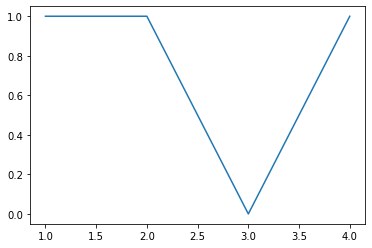

In [158]:
x = [1, 2, 3, 4]
y = [1, 1, 0, 1]
plt.plot(x, y);

### Python versijų įtaka

matplotlib pakuotė valdo ne vien tik komandas paišymo bet ir renkasi kas ir
kaip kompiuteryje generuos grafikus.

Nurodžius vietoj inline qt grafikai iššoka

In [160]:
%matplotlib qt
plt.plot(x, y);

Taupant laiką mes beveik visada naudosime inline metodą

In [161]:
%matplotlib inline

Paišant grafikus ne ipython, o python terminale grafikai nebus
vaizduojami kol nebus įgyvendinta komanda:

In [162]:
plt.show()

Po šios komandos norėdami galėti dar keisti paveikslėli reikia įjungti
interaktyvų paišymą.

In [163]:
plt.ion()

Jei interaktyvių funkcijų nenorime (pvz jei automatiškai paišome daug grafikų
ir svarbu optimizuoti resursus) išjungiame ioff metodu

In [164]:
plt.ioff()

### Paveikslų sukūrimas ir saugojimas

Norint išsaugoti grafiką dabartinėje aktyvioje direktorijoje

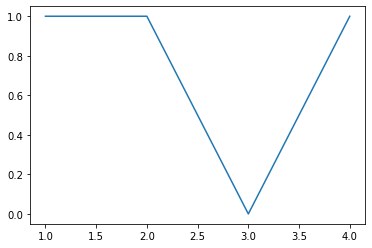

In [165]:
fig = plt.figure() # sukuriam figūrą
plt.plot(x,y) # nupaišome ant jos
fig.savefig('test.png') # užsaugome png formatu

Norint išsaugoti kitoje vietoje reik nurodyti pilną kelią.

Formatai kuriais galima išsaugoti

In [166]:
fig.canvas.get_supported_filetypes()

{'ps': 'Postscript',
 'eps': 'Encapsulated Postscript',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

Kurdami figūrą galime nurodyti jos dydį, tada ant figūros nupaišome
drobę/ašis.

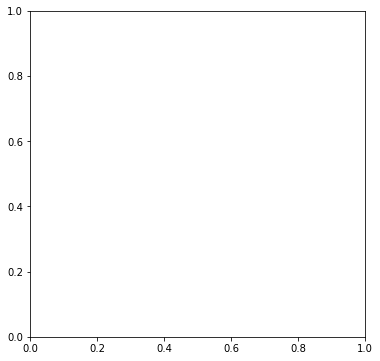

In [167]:
fig = plt.figure(figsize=(6,6))
ax = plt.axes()

Figūros objektą dažniausiai priskiriame kintamajam `fig`, o ašių `ax`.
Šių objektų pagalba nurodome tiksliai kur paišyti.

Jei kintamųjų nepriskyrėme juos galime gauti gcf komanda.
plt.gcf kintamasis saugo paskutinę aktyvią figūrą.

In [168]:
fig = plt.gcf() # get current figure

<Figure size 432x288 with 0 Axes>

Ašis panašiai gauname `gca` komanda

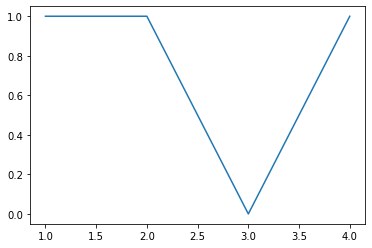

In [169]:
ax = plt.gca() # (get current axes)
ax.plot(x,y)

Pavyzdžiuose dažnai matysite paišymą atliekama kitokiu stiliumi.
Vietoj objektų kūrimo dažnai rašomos paišymo komandos kurios užduotis
automatiškai atlieka paskutiniame aktyviame elemente.

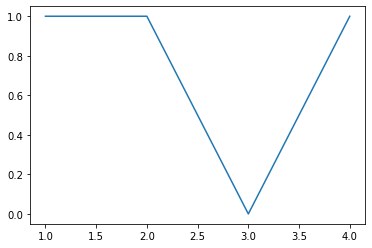

In [170]:
plt.figure()
plt.plot(x,y)

`plt.komanda`  įgyvendina `komandą` paskutiniame aktyviame elemente.

Tokiu būdu dažnai sutaupoma rašymo vieta, lengviau perskaityt kodą.
Kitas didelis pranašumas tai kad atmetus plt. dalį komandos tampa tolygios matlab ar julia programavimo kalbų komandoms.

Bet toks stilius sukuria ir daug problemų ir apsunkina kūrimą sudėtingų
grafikų.

### Bazė

Pirmiausiai sukursime duomenis tolimesniam paišymui.

`sin_wave`  funkcija generuos sinusoidę kuria nupiešime

In [171]:
import math

def sin_wave(freq,t):
    y = []
    f =freq # Hz
    for x in t:
       x=x/1000
       y.append(math.sin(2*math.pi*x*f))
    return y


def line_points(t,shift):
    y=[]
    for x in t:
        y.append(x+shift)
    return y

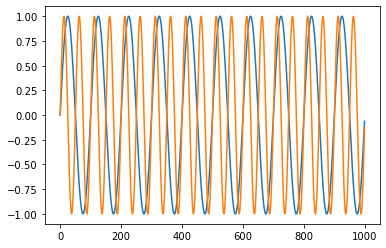

In [172]:
t = list(range(0,1000))
fig = plt.figure()
ax = plt.axes()         #  - a) Sukūrimas ašių
ax.plot(t,sin_wave(10,t)) #  - b) paišymas sinusoidės
ax.plot(t,sin_wave(20,t)) #  - c) paišymas tame pačiame grafike
#  fig.show()              #  - d) papildomos komanodos

Sukurtos funkcijos sinusoidės paišymui neefektyvios.
Tokiom užduotims mes galime panaudoti NumPy vektorizaciją.

In [173]:
def sin_wave(Hz=10, sample_rate=1000, length_sec=1):
    t = np.linspace(0, length_sec, length_sec * sample_rate, endpoint=False)
    x = np.sin(Hz * 2 * np.pi * t)
    return(t, x)

def line_points(shift, sample_rate=1000, length_sec=1):
    t = np.linspace(0, length_sec, length_sec * sample_rate, endpoint=False)
    x = t+shift
    return(t, x)

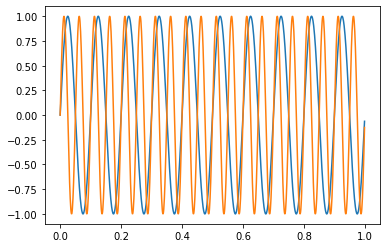

In [174]:
fig = plt.figure()
ax = plt.axes()         #  - a) Sukūrimas ašių
ax.plot(*sin_wave(10)) #  - b) paišymas sinusoidės
ax.plot(*sin_wave(20)) #  - c) paišymas tame pačiame grafike
#  fig.show()              #  - d) papildomos komanodos

## Pagražinimas

Spalvos priskiriamos automatiškai, bet norint galima nurodyti `color`
raktažodžiu

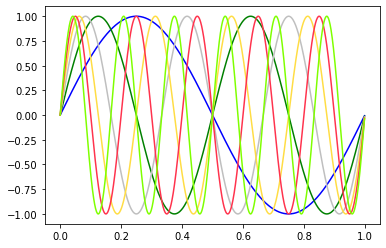

In [175]:
ax = plt.axes()
ax.plot(*sin_wave(1), color='blue')         # specifinė spalva
ax.plot(*sin_wave(2), color='g')           # trumpinys (rgbcmyk)
ax.plot(*sin_wave(3), color='0.75')        # tarp 0 ir 1
ax.plot(*sin_wave(4), color='#FFDD44')     # Hex kodas (RRGGBB 00 iki FF)
ax.plot(*sin_wave(5), color=(1.0,0.2,0.3)) # RGB, 0 iki 1
ax.plot(*sin_wave(6), color='chartreuse'); # HTML vardai

Linijų stilius keičiamas `linestyle` raktažodžiu

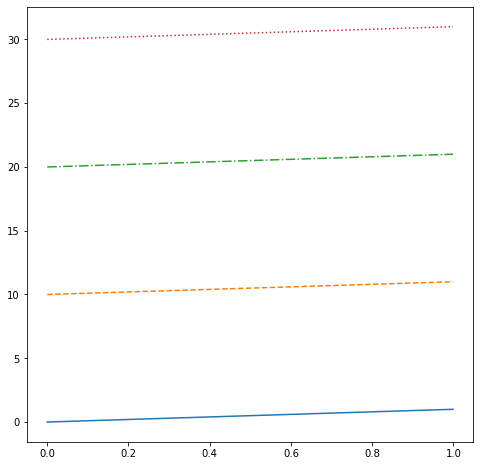

In [176]:
fig=plt.figure(figsize=(8,8))
ax = plt.axes()
ax.plot(*line_points(0), linestyle='solid')
ax.plot(*line_points(10), linestyle='dashed')
ax.plot(*line_points(20), linestyle='dashdot')
ax.plot(*line_points(30), linestyle='dotted');

Arba simboliais

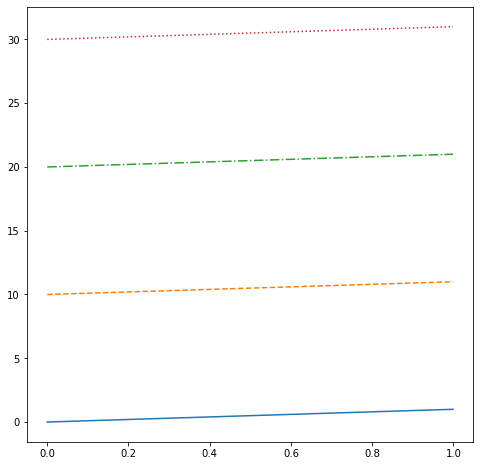

In [177]:
fig=plt.figure(figsize=(8,8))
ax = plt.axes()
ax.plot(*line_points(0), linestyle='-')  # solid
ax.plot(*line_points(10), linestyle='--') # dashed
ax.plot(*line_points(20), linestyle='-.') # dashdot
ax.plot(*line_points(30), linestyle=':'); # dotted

Priartinimas ir atitolinimas grafiko nustatomas ašių koordinatėmis

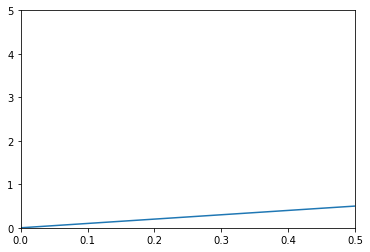

In [178]:
fig = plt.figure()
ax = plt.axes()
ax.plot(*line_points(0), linestyle='-')
ax.plot(*line_points(10), linestyle='--')
ax.plot(*line_points(20), linestyle='-.')
ax.plot(*line_points(30), linestyle=':')
ax.set_xlim([0, .5])
ax.set_ylim([0, 5]);
# plt.xlim([0, 100]) # Skiriasi sintaksė
# plt.ylim([0, 100]) # Skiriasi sintaksė

Apverčiam ašis

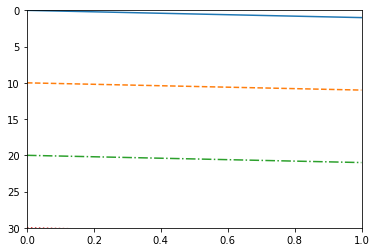

In [179]:
fig = plt.figure()
ax = plt.axes()
ax.plot(*line_points(0), linestyle='-')
ax.plot(*line_points(10), linestyle='--')
ax.plot(*line_points(20), linestyle='-.')
ax.plot(*line_points(30), linestyle=':')
ax.set_xlim([0, 1])
ax.set_ylim([30, 0]);

Tuo pat metu  x ir y galima nustatyti `axis` metodu

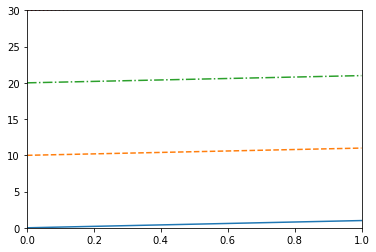

In [180]:
fig = plt.figure()
ax = plt.axes()
ax.plot(*line_points(0), linestyle='-')
ax.plot(*line_points(10), linestyle='--')
ax.plot(*line_points(20), linestyle='-.')
ax.plot(*line_points(30), linestyle=':')
ax.axis([0,1,0,30]);

(-0.04995, 1.04895, -1.54995, 32.54895)

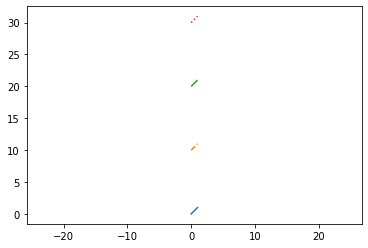

In [181]:
fig = plt.figure()
ax = plt.axes()
ax.plot(*line_points(0), linestyle='-')
ax.plot(*line_points(10), linestyle='--')
ax.plot(*line_points(20), linestyle='-.')
ax.plot(*line_points(30), linestyle=':')
ax.axis('equal')

(-0.04995, 1.04895, -1.54995, 32.54895)

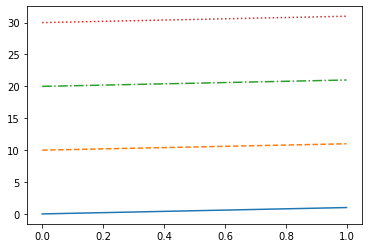

In [182]:
fig = plt.figure()
ax = plt.axes()
ax.plot(*line_points(0), linestyle='-')
ax.plot(*line_points(10), linestyle='--')
ax.plot(*line_points(20), linestyle='-.')
ax.plot(*line_points(30), linestyle=':')
ax.axis('tight')

### Anotacijos

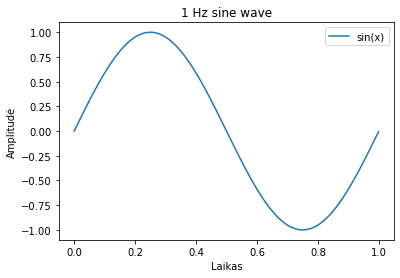

In [183]:
fig = plt.figure()
ax = plt.axes()
ax.plot(*sin_wave(1), label='sin(x)') # legendai skirtas tekstas
ax.set_xlabel("Laikas")
ax.set_ylabel("Amplitudė")
ax.set_title("1 Hz sine wave") # pavadinimas
ax.legend(); # legenda

`plt` --> xlabel, ylabel title

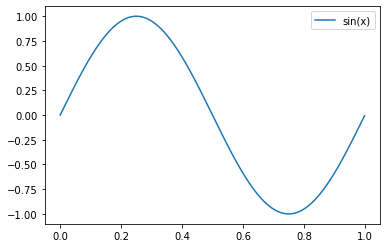

In [184]:
plt.figure()
plt.plot(*sin_wave(1), label = 'sin(x)')
plt.legend()

`loc`  parametras nurodo kur atsiras legenda

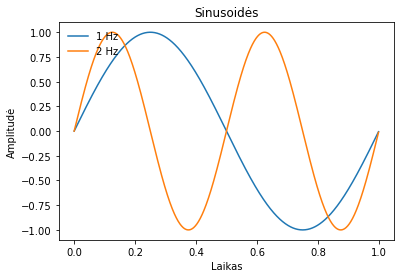

In [185]:
fig = plt.figure()
ax = plt.axes()
ax.plot(*sin_wave(1), label='1 Hz')
ax.plot(*sin_wave(2), label='2 Hz')
ax.set_xlabel("Laikas")
ax.set_ylabel("Amplitudė")
ax.set_title("Sinusoidės")
ax.legend(loc='upper left',frameon=False)

Stilių elementų galima nurodyti gana detaliai

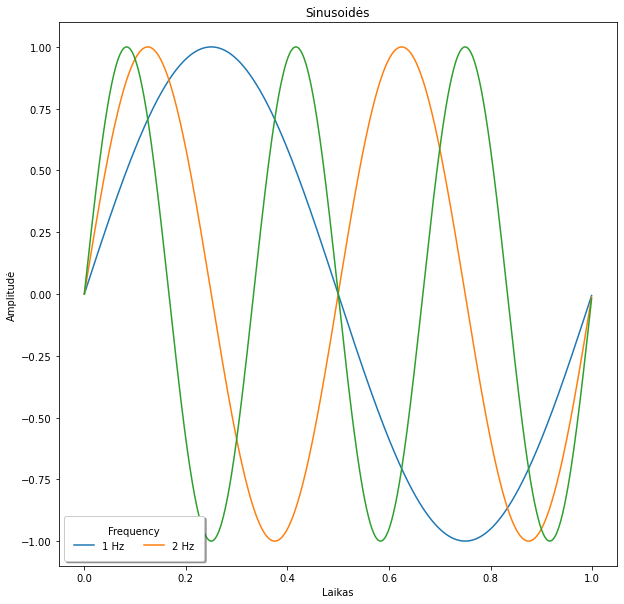

In [186]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes()
ax.plot(*sin_wave(1), label='1 Hz')
ax.plot(*sin_wave(2), label='2 Hz')
ax.plot(*sin_wave(3)) # nenurodžius neatsiras legendoje
ax.set_xlabel("Laikas")
ax.set_ylabel("Amplitudė")
ax.set_title("Sinusoidės")
ax.legend(ncol=2, borderpad=1, shadow=True, framealpha=1, fancybox=True, title='Frequency')

Nenurodžius žymės (label) legendoje nebus įtrauktas elementas.
Legendą galima nurodyti vėliau

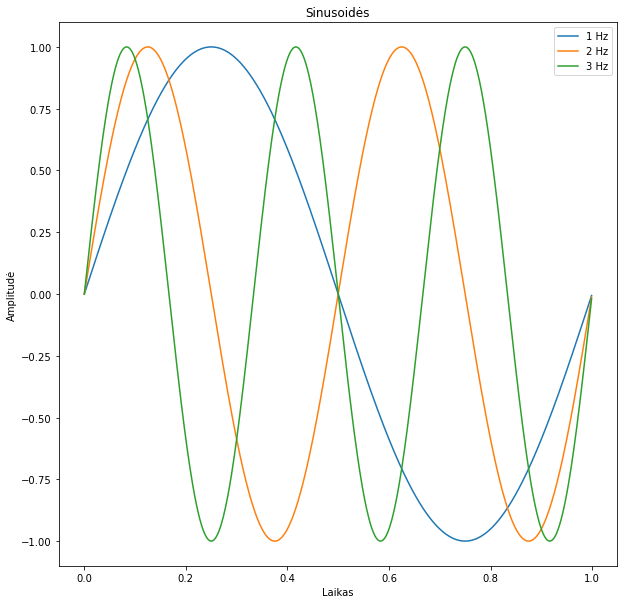

In [187]:
ax.legend(['1 Hz', '2 Hz', '3 Hz'])
fig

Norint sukurti daugiau negu vieną legendą reikia pridėti naują legendos
objektą iš matplotlib.

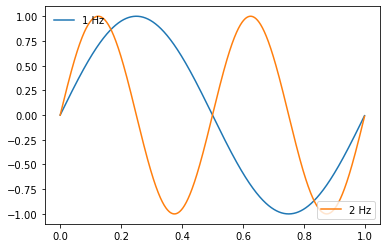

In [188]:
fig1 = plt.figure()
ax1 = plt.axes()
lines = []
lines += ax1.plot(*sin_wave(1))
lines += ax1.plot(*sin_wave(2))
ax1.legend(lines[:1],['1 Hz'],loc='upper left',frameon=False)
leg2 = mpl.legend.Legend(ax1,lines[1:2],['2 Hz'],loc='lower right')
ax1.add_artist(leg2)

## Sklaidos grafikai

Pradžioje sugeneruosim atsitiktinių taškų vizualizacijai

In [189]:
t = np.linspace(0, 1, 10, endpoint=False)
points = np.random.random(10)

Standartinė plot funkcija yra universali.
Sklaidos grafikus galime brėžti nurodžius taškus žymėti `o` simboliu.

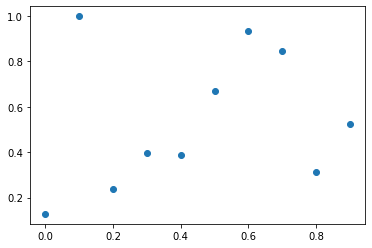

In [190]:
plt.plot(t,points, 'o')

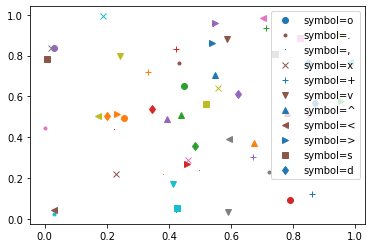

In [191]:
import random
ax = plt.axes()
for symbol in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    ax.plot(random.random(), random.random(), symbol, label=f"symbol={symbol}")
    ax.plot(random.random(), random.random(), symbol)
    ax.plot(random.random(), random.random(), symbol)
    ax.plot(random.random(), random.random(), symbol)
    ax.plot(random.random(), random.random(), symbol)
ax.legend(numpoints=1, loc='upper right')

Įvairius parametrus galima maišyti ir gauti bet kokį grafiką.

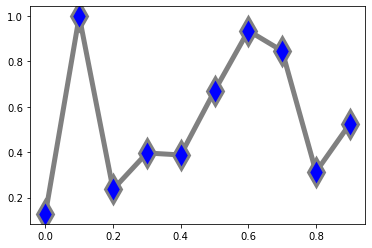

In [192]:
plt.plot(t, points, '-d', color='gray',
         markersize=20, linewidth=5,
         markeredgecolor='gray',
         markerfacecolor='blue',
         markeredgewidth=3)

### plt.scatter

Visgi tokiems dažniems grafikams yra specifinės komandos palengvinančios vizualizaciją .

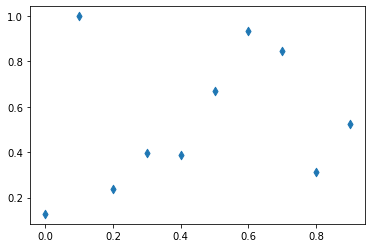

In [193]:
plt.scatter(t,points, marker = 'd')

`scatter` komanda turi daug metodų būtent šiam vizualizacijos tipui kas
leidžia daug greičiau pasiekti norimą rezultatą.

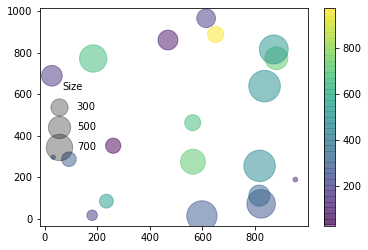

In [194]:
x = random.sample(list(range(1000)),20)
y = random.sample(list(range(1000)),20)
colors = random.sample(list(range(1000)),20)
sizes = random.sample(list(range(1000)),20)
plt.scatter(x, y, c=colors, s=sizes, alpha=0.5,
            cmap='viridis')
plt.colorbar()
for size in [300, 500, 700]:
    plt.scatter([],[],color='black',alpha=.3,s=size, label=f"{size}")
plt.legend(scatterpoints=1,frameon=False,labelspacing=1,title='Size')

Scatter funkcija turi daugiau metodų ir parametrų.
Tai palengvina grafikų kūrimą, bet taip pat ir sulėtina programos darbą.
Paprastiems sklaidos grafikams turint didelius duomenų masyvus geriau naudoti plot funkciją

### Spalvų žemėlapiai (colormaps)

Susikuriam funkciją kurios pagalba vaizdinsim žemėlapius

In [195]:
def view_cmap(cmap):
    ax = plt.axes()
    cmap = plt.cm.get_cmap(cmap)
    cmap = cmap(list(range(cmap.N)))
    ax.imshow([cmap],extent=[0,10,0,1])

Yra be galo daug spalvų žemėlapių, bet juos visus galima padalinti į grupes:

- Nuoseklūs --- tęstinės nepertraukiamos spalvos. Tai dažniausiai naudojami žemėlapiai.
Juos lengva interpretuoti, dažniausiai spalvos ryškis kinta su
duomenimis.

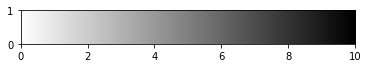

In [196]:
view_cmap('binary')

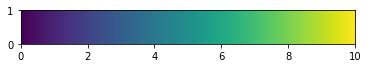

In [197]:
view_cmap('viridis')

- Išsiskiriantys --- naudojamos skirtingos spalvos.
Šie žemėlapiai labiausiai tinkami parodyti dvi skirtingas puses.

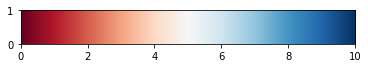

In [198]:
view_cmap('RdBu')

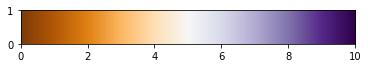

In [199]:
view_cmap('PuOr')

- Kokybiniai: daugelio spalvų mišinys

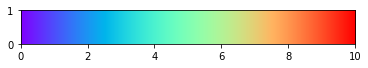

In [200]:
view_cmap('rainbow')

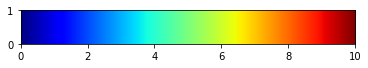

In [201]:
view_cmap('jet')

### Spalvų juostos parametrai

Kartais norint paryškinti efektus reikia pakeisti z ašies ribas.

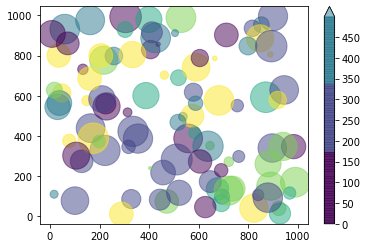

In [202]:
x = random.sample(list(range(1000)),100)
y = random.sample(list(range(1000)),100)
colors = random.sample(list(range(1000)),100)
sizes = random.sample(list(range(1000)),100)
fig = plt.figure()
ax = plt.axes()
scat = ax.scatter(x, y, c=colors, s=sizes, alpha=0.5,
            cmap=plt.cm.get_cmap('viridis',6))
fig.colorbar(scat, extend='max',boundaries=list(range(501)))
# plt.colorbar()
# plt.clim(0, 500)

### Statistiniai elementai

Seaborn pakuotė yra geriau pritaikyta šiems elementams vaizduoti.

<ErrorbarContainer object of 3 artists>

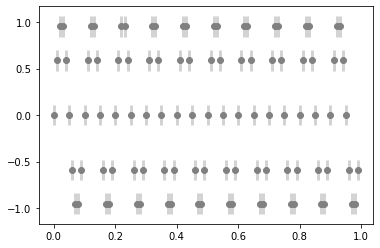

In [203]:
error=.11
plt.errorbar(*sin_wave(10, sample_rate=100), yerr=error, fmt='o',color='gray',
        ecolor = 'lightgray',elinewidth=3,capsize=0)

Nurodant nuolatinį nuokrypį užpildome erdvę tarp dviejų verčių

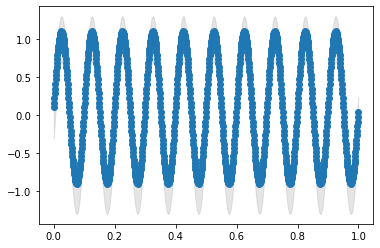

In [204]:
x,y = sin_wave(10)
plt.plot(x,y+.1, 'o-')
plt.fill_between(x,y-.3, y+.3, # arba plt.fill
                 color='gray', alpha=0.2)

### Histograma

`hist` paišo histogramas.
Dauguma parametrų yra tokie patys kaip ir prieš tai minėtuose
funkcijose.
Prisideda tik duomenų normalizavimas ir suskirstymas.

(array([1.05, 0.4 , 0.4 , 0.3 , 0.36, 0.34, 0.3 , 0.4 , 0.4 , 1.05]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

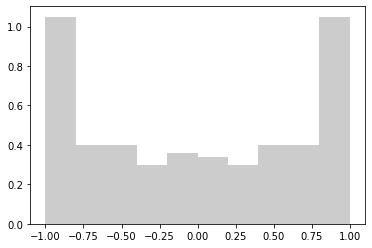

In [205]:
plt.hist(y, bins=10, density=True, alpha=.4,
        color='gray',edgecolor='none'
        )

## Daugiaašiai grafikai (subplots)

Daugiausiai kontrolės turintis būdas yra sukurti naujas ašis nurodytuose koordinatėse.

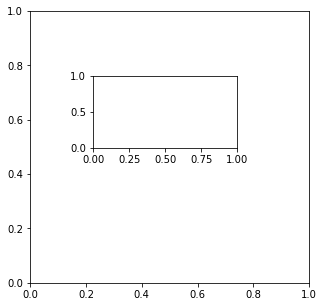

In [206]:
fig=plt.figure(figsize=(5,5))
ax1 = plt.axes()
# pradžia nuo figūros kairės, apačios, ilgis, aukštis
ax2 = plt.axes([0.3, 0.5, 0.4, 0.2])

arba pridedant ašis prie figūros

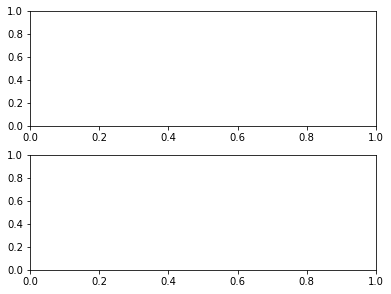

In [207]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8,0.4])
ax2 = fig.add_axes([0.1, 0, 0.8,0.4])

Paprasčiau yra naudoti `subplot` funkciją kur nurodome skaičių
stulpelių, eilučių ir kaip jie dalinasi ašis.

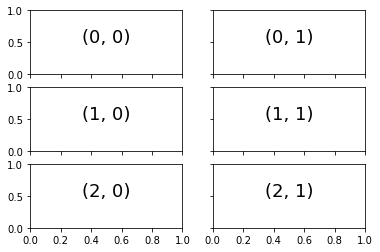

In [208]:
fig, ax = plt.subplots(ncols= 2, nrows=3, sharex='col', sharey='row')
for i in range(3):
    for j in range(2):
        ax[i, j].text(0.5, 0.5, str((i, j)), # ax contains all the axes
                      fontsize=18, ha='center')

Sudėtingesniems grafikams naudojamas `gridspec`

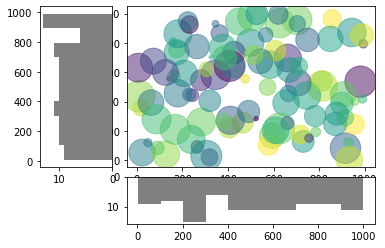

In [209]:
x = random.sample(list(range(1000)),100)
y = random.sample(list(range(1000)),100)
colors = random.sample(list(range(1000)),100)
sizes = random.sample(list(range(1000)),100)
fig = plt.figure()
grid = plt.GridSpec(4, 4, wspace=0.2, hspace=0.2) # creates 4 by 4 grid with spacing
ax=fig.add_subplot(grid[:-1, 1:]) # subplot will take space from top to 2nd from bottom element and from 2nd element from left to right
ax1=fig.add_subplot(grid[:-1, 0]) # subplot will take space from top to 2nd from bottom element and first from left
ax2=fig.add_subplot(grid[-1, 1:]) # subplot will take space at the bottom and from 2nd element from left to right
ax.scatter(x, y, c=colors, s=sizes, alpha=0.5, cmap='viridis')
ax1.hist(x,orientation='horizontal',color='gray')
ax2.hist(y,orientation='vertical',color='gray')
ax1.invert_xaxis()
ax2.invert_yaxis()

### Žymės (ticks)

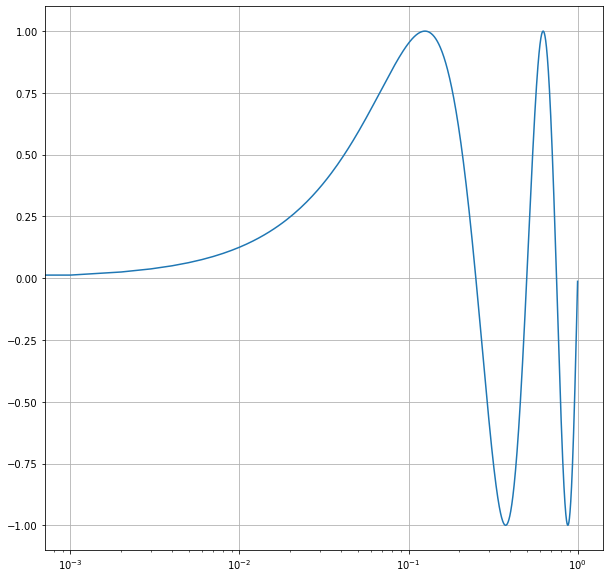

In [210]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(xscale='log',yscale='linear')
ax.plot(*sin_wave(2))
ax.grid()

Grafike matome pagrindinius (major) ir šalutinius (minor) žymenis.
Jie kontroliuojami per ašių xaxis ir yaxis objektus.

Naudojimo pvz:

Išjungti skaičius ir žymenis

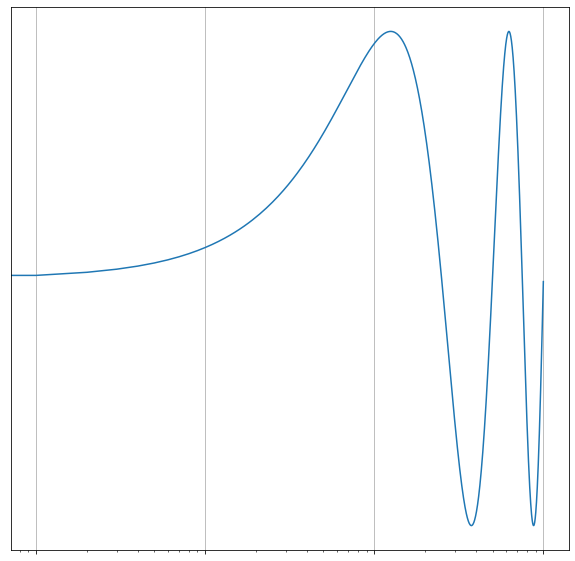

In [211]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(xscale='log',yscale='linear')
ax.plot(*sin_wave(2))
ax.grid()
ax.yaxis.set_major_locator(plt.NullLocator()) # locator keičia vertes
ax.xaxis.set_major_formatter(plt.NullFormatter()) # formatter keičia išvaizdą.

Žymenų dažnis

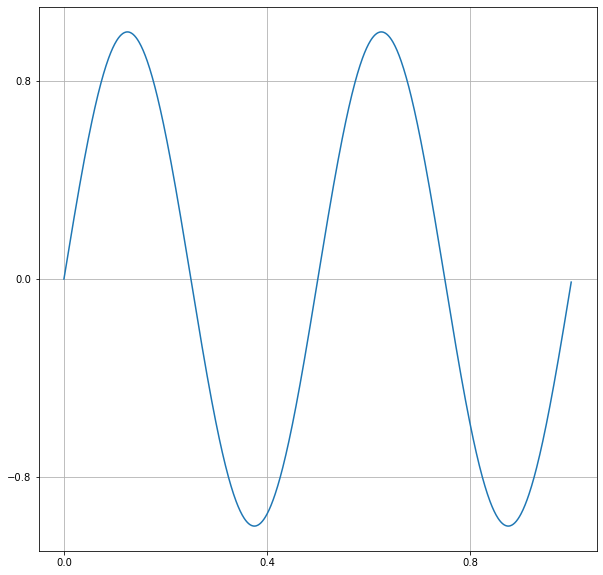

In [212]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes()
ax.plot(*sin_wave(2))
ax.grid()
ax.yaxis.set_major_locator(plt.MaxNLocator(3))
ax.xaxis.set_major_locator(plt.MaxNLocator(3))

Specifinių žymenų parinkimas

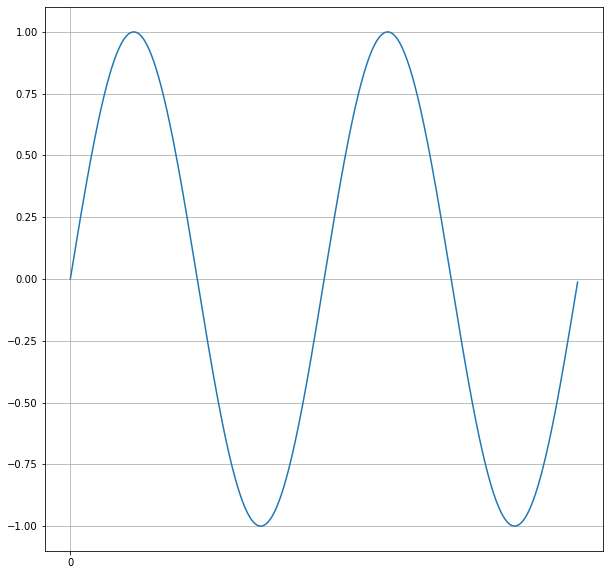

In [213]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes()
ax.plot(* sin_wave(2))
ax.grid()
ax.xaxis.set_major_locator(plt.MultipleLocator(125)) # multiples of
ax.xaxis.set_minor_locator(plt.MultipleLocator(25))

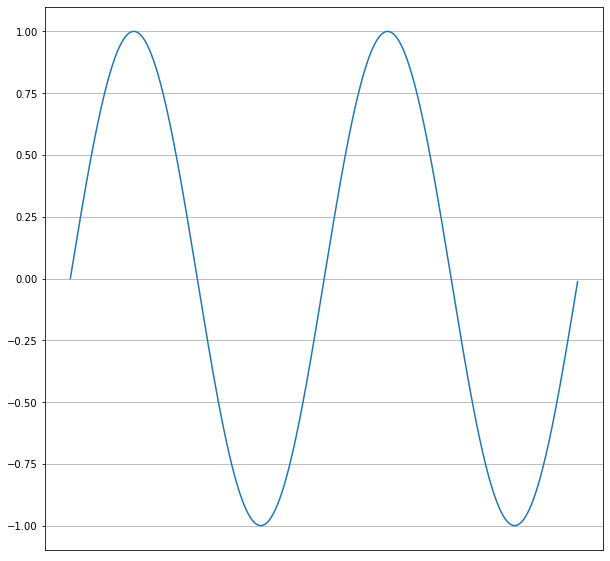

In [214]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes()
ax.plot(*sin_wave(2))
ax.grid()
ax.xaxis.set_major_locator(plt.FixedLocator([145, 333, 897]))
ax.xaxis.set_major_formatter(plt.FixedFormatter(['a', 'b', 'c']))

Visi parametrai:

Pirmiausiai pasirenkame tarp pagrindinių ir šalutinių žymenų

Tada renkamės tarp locator ir formatter metodų

- locator keičia kur žymenys yra:
  - AutoLocator: numatytasis
  - NullLocator: nėr žymenų
  - FixedLocator: pagal sąrašą
    - LinearLocator: vienodai išdėstyti tarp dviejų taškų
    - LogLocator:  logaritminis išdėstymas
    - MultipleLocator: išdėstyti kas x vienetų
    - MaxNLocator: automatiškai išdėsto N žymenų
- formatter pakeičia išvaizdą (tekstą)
  - ScalarFormatter ar LogFormatter: pagal ašis numatytasis
  - NullFormatter: nėra teksto
  - FixedFormatter: žymenys iš sąrašo
  - FuncFormatter: žymenys iš funkcijos

### Anotacijos

Norint pavaizduoti tekstą x,y koordinatėse `plt.text(x,y,message,ha='')`

Text(0.51, 1, 'Peak')

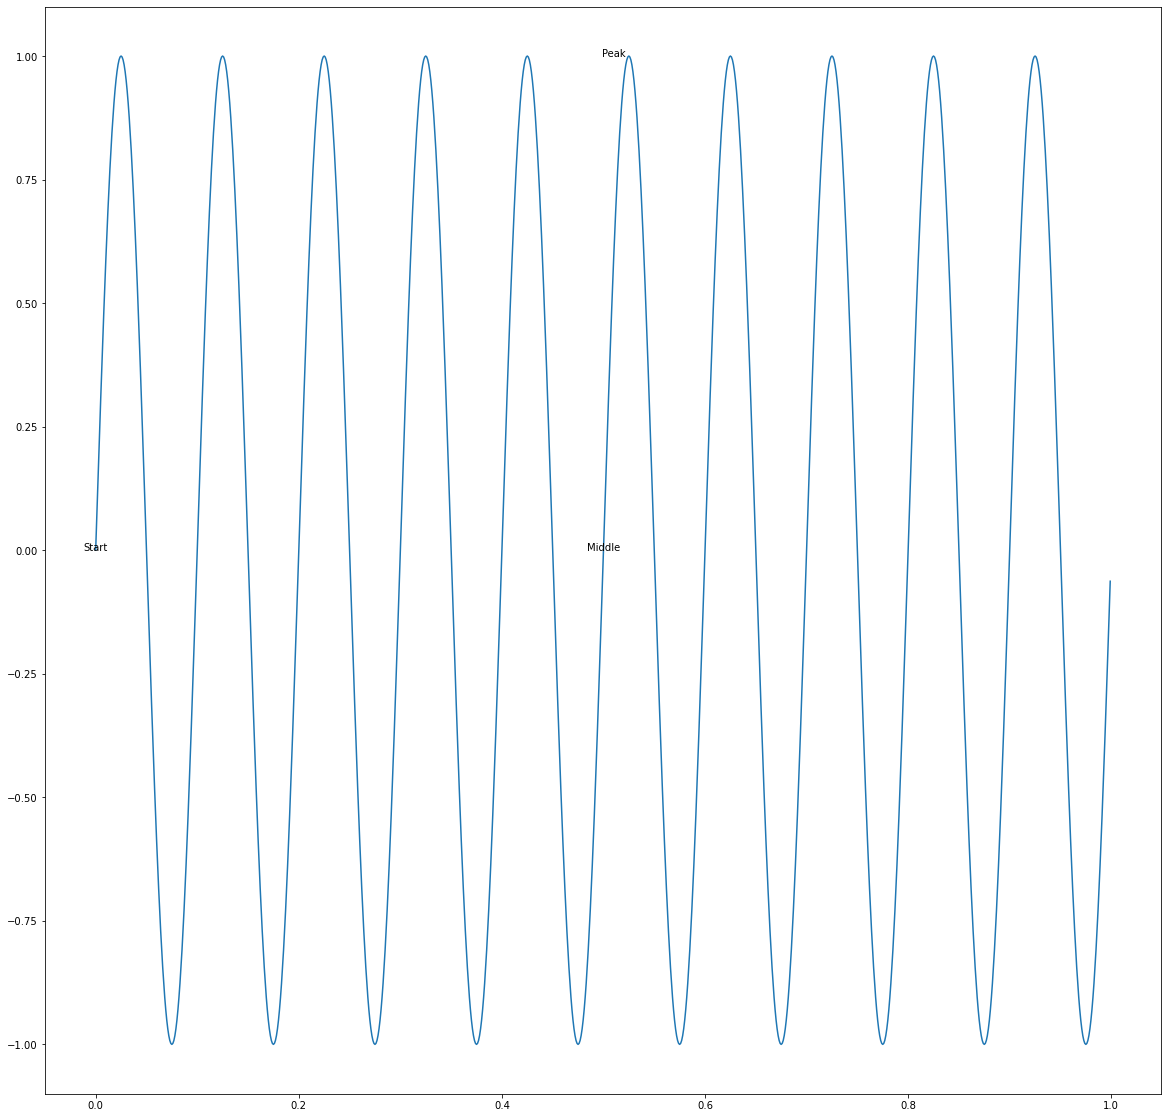

In [215]:
fig = plt.figure(figsize=(20,20))
ax = plt.axes()
ax.plot(*sin_wave(10))
ax.text(0,0,'Start',ha='center')
ax.text(.5,0,'Middle',ha='center')
ax.text(.51,1,'Peak',ha='center')

X ir Y yra koordinatės duomenų atžvilgiu.
Kartais norime dėti žymenis grafiko atžvilgiu.

Text(0.2, 0.5, '. Figure: (0.2, 0.2)')

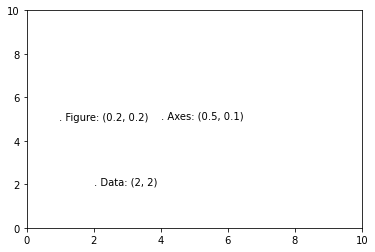

In [216]:
fig, ax = plt.subplots()
ax.axis([0, 10, 0, 10])
ax.text(2, 2, ". Data: (2, 2)", transform=ax.transData) # default
ax.text(0.4, 0.5, ". Axes: (0.5, 0.1)", transform=ax.transAxes) # ašių dimensijos
ax.text(0.2, 0.5, ". Figure: (0.2, 0.2)", transform=fig.transFigure) # Figūros dimensijos

Jei dabar pakeistumėme ašių ribas pasikeis tik `transData` variantas.

(0.0, 6.0)

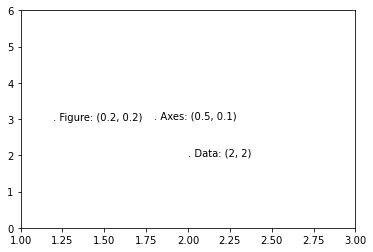

In [217]:
fig, ax = plt.subplots()
ax.axis([0, 10, 0, 10])
ax.text(2, 2, ". Data: (2, 2)", transform=ax.transData)
ax.text(0.4, 0.5, ". Axes: (0.5, 0.1)", transform=ax.transAxes)
ax.text(0.2, 0.5, ". Figure: (0.2, 0.2)", transform=fig.transFigure)
ax.set_xlim(1, 3)
ax.set_ylim(0,6)

Rodyklę sukuriame annotate komanda
annotate(text, xy=koordinatės rodyklės galvos, xytext = teksto koordinatės, arrowprops = rodyklės stilius)

Text(0.6, -2, 'local minimum')

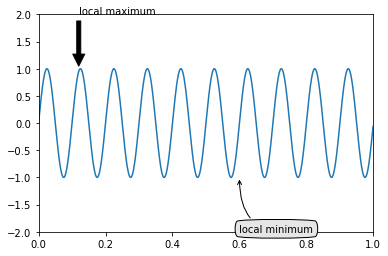

In [218]:
fig = plt.figure()
ax = plt.axes()
ax.plot(*sin_wave(10))
ax.set_ylim(-2,2)
ax.set_xlim(0,1)
ax.annotate('local maximum',xy=(0.12,1),xytext=(0.12,2),arrowprops=dict(facecolor='black',shrink=0.05))
ax.annotate('local minimum', xy=(0.6, -1), xytext=(0.6, -2), bbox=dict(boxstyle="round4,pad=.5", fc="0.9"), arrowprops=dict(arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=-90"))

### Stilius grafikų

Numatytasis stilius grafiko: plt.rcParams

In [219]:
style = plt.rcParams.copy()
style

{'_internal.classic_mode': False,
 'agg.path.chunksize': 0,
 'animation.avconv_args': [],
 'animation.avconv_path': 'avconv',
 'animation.bitrate': -1,
 'animation.codec': 'h264',
 'animation.convert_args': [],
 'animation.convert_path': 'convert',
 'animation.embed_limit': 20.0,
 'animation.ffmpeg_args': [],
 'animation.ffmpeg_path': 'ffmpeg',
 'animation.frame_format': 'png',
 'animation.html': 'none',
 'animation.html_args': [],
 'animation.writer': 'ffmpeg',
 'axes.autolimit_mode': 'data',
 'axes.axisbelow': 'line',
 'axes.edgecolor': 'black',
 'axes.facecolor': 'white',
 'axes.formatter.limits': [-5, 6],
 'axes.formatter.min_exponent': 0,
 'axes.formatter.offset_threshold': 4,
 'axes.formatter.use_locale': False,
 'axes.formatter.use_mathtext': False,
 'axes.formatter.useoffset': True,
 'axes.grid': False,
 'axes.grid.axis': 'both',
 'axes.grid.which': 'major',
 'axes.labelcolor': 'black',
 'axes.labelpad': 4.0,
 'axes.labelsize': 'medium',
 'axes.labelweight': 'normal',
 'axes.li

Galime numatytąjį stilių pakeisti

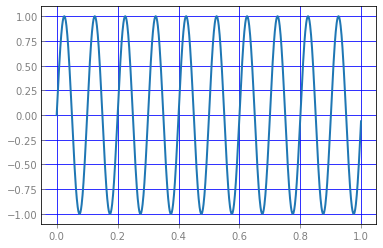

In [220]:
plt.rc('grid', color='blue', linestyle='solid')
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='in', color='gray')
plt.rc('patch', edgecolor='white')
plt.rc('lines', linewidth=2)
fig = plt.figure()
ax = plt.axes()
ax.plot(*sin_wave(10))
ax.grid()

Bet lengviau pasirinkti vieną iš daugelio sukurtų stilių

In [221]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

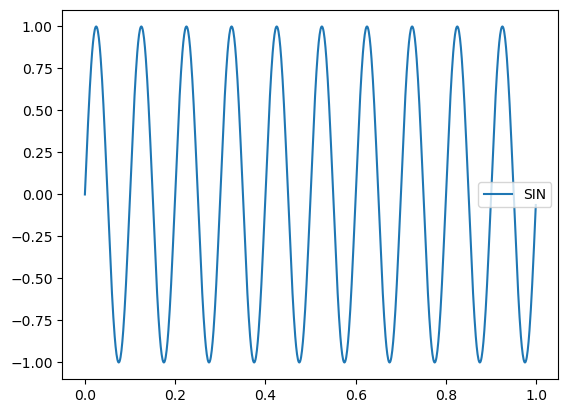

In [222]:
plt.style.use('default')
fig = plt.figure()
ax = plt.axes()
ax.plot(*sin_wave(10),label='SIN')
ax.legend()

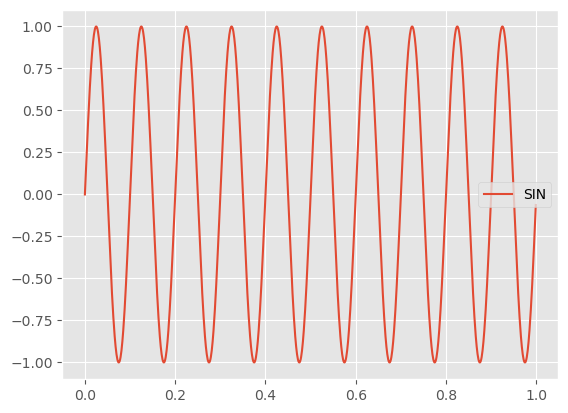

In [223]:
plt.style.use('ggplot')
fig = plt.figure()
ax = plt.axes()
ax.plot(*sin_wave(10),label='SIN')
ax.legend()

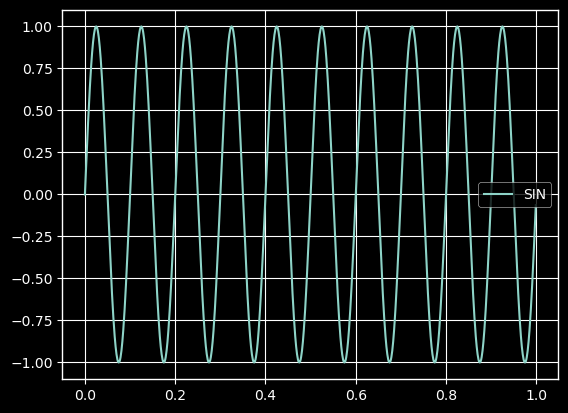

In [224]:
plt.style.use('dark_background')
fig = plt.figure()
ax = plt.axes()
ax.plot(*sin_wave(10),label='SIN')
ax.legend()

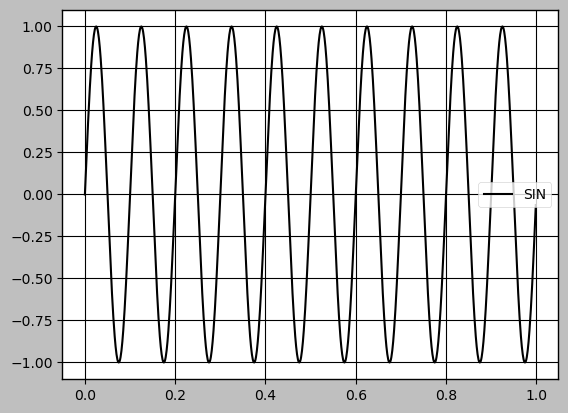

In [225]:
plt.style.use('grayscale')
fig = plt.figure()
ax = plt.axes()
ax.plot(*sin_wave(10),label='SIN')
ax.legend()

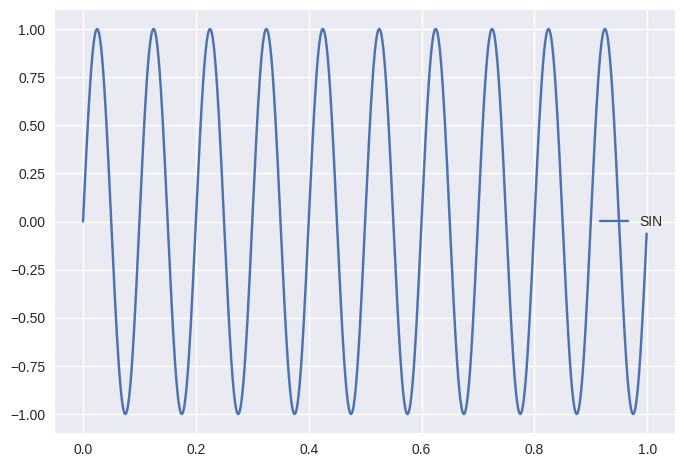

In [226]:
plt.style.use('seaborn')
fig = plt.figure()
ax = plt.axes()
ax.plot(*sin_wave(10),label='SIN')
ax.legend()

[Matplotlib galerija skirtingų grafikų](https://matplotlib.org/gallery.html)